# Project 1: Animal Crossing New Horizons Villagers

author: Rachel Nelson

class: DSC680

In [321]:
# Importing required libraries.
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)


In [322]:
# import data from csv and excel (villager data and ranking data)
df = pd.read_csv("D:/College/DSC680/Project 1/data/villagers.csv")
df_rank = pd.read_excel("D:/College/DSC680/Project 1/data/Villager_Ranking.xlsx")

In [323]:
# Review the villager data
print(df.head(10))
print(df.info())

       Name    Species  Gender Personality      Hobby Birthday Catchphrase  \
0   Admiral       Bird    Male      Cranky     Nature   27-Jan     aye aye   
1   Agent S   Squirrel  Female       Peppy    Fitness    2-Jul    sidekick   
2     Agnes        Pig  Female  Big Sister       Play   21-Apr     snuffle   
3        Al    Gorilla    Male        Lazy    Fitness   18-Oct     ayyyeee   
4   Alfonso  Alligator    Male        Lazy       Play    9-Jun    it'sa me   
5     Alice      Koala  Female      Normal  Education   19-Aug      guvnor   
6      Alli  Alligator  Female      Snooty    Fashion    8-Nov     graaagh   
7    Amelia      Eagle  Female      Snooty      Music   19-Nov         cuz   
8  Anabelle   Anteater  Female       Peppy    Fashion   16-Feb      snorty   
9   Anchovy       Bird    Male        Lazy       Play    4-Mar      chuurp   

   Favorite Song   Style 1  Style 2   Color 1 Color 2  \
0     Steep Hill      Cool     Cool     Black    Blue   
1  Go K.K. Rider    Active 

There are 391 records on the villager dataframe. They are all object type.

In [324]:
# Reviewing the Villager Ranking data
print(df_rank.head(10))
print(df_rank.info())

   Rank  Villager    Tier
0   129       Ace  TIER 4
1   300   Admiral  TIER 6
2   117   Agent S  TIER 4
3    76     Agnes  TIER 4
4   275        Al  TIER 6
5   152   Alfonso  TIER 5
6   154     Alice  TIER 5
7   379      Alli  TIER 6
8   203    Amelia  TIER 5
9   210  Anabelle  TIER 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      413 non-null    int64 
 1   Villager  413 non-null    object
 2   Tier      413 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.8+ KB
None


The numerical ranking is an int, while the tier is set to an object data type. There are more villagers
in this data set (413 villagers)


In [325]:
#Merge villager list and rank list on villager's namne
df = pd.merge(df, df_rank, left_on='Name', right_on='Villager')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
 17  Rank             391 non-null    in

In [326]:
# drop columns not planning to use
df = df.drop(columns=['Villager','Name','Birthday','Catchphrase','Furniture List','Unique Entry ID','Filename','Wallpaper','Flooring','Favorite Song'])
df.head(5)

,Species,Gender,Personality,Hobby,Style 1,Style 2,Color 1,Color 2,Rank,Tier
0,Bird,Male,Cranky,Nature,Cool,Cool,Black,Blue,300,TIER 6
1,Squirrel,Female,Peppy,Fitness,Active,Simple,Blue,Black,117,TIER 4
2,Pig,Female,Big Sister,Play,Simple,Elegant,Pink,White,76,TIER 4
3,Gorilla,Male,Lazy,Fitness,Active,Active,Red,White,275,TIER 6
4,Alligator,Male,Lazy,Play,Simple,Simple,Red,Blue,152,TIER 5


In [327]:
# remove the word "Tier" from tier column
df = df.replace('TIER ','', regex=True)
df.head(5)

,Species,Gender,Personality,Hobby,Style 1,Style 2,Color 1,Color 2,Rank,Tier
0,Bird,Male,Cranky,Nature,Cool,Cool,Black,Blue,300,6
1,Squirrel,Female,Peppy,Fitness,Active,Simple,Blue,Black,117,4
2,Pig,Female,Big Sister,Play,Simple,Elegant,Pink,White,76,4
3,Gorilla,Male,Lazy,Fitness,Active,Active,Red,White,275,6
4,Alligator,Male,Lazy,Play,Simple,Simple,Red,Blue,152,5


In [328]:
# change data type to numeric
df["Tier"] = pd.to_numeric(df["Tier"])
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Species      391 non-null    object
 1   Gender       391 non-null    object
 2   Personality  391 non-null    object
 3   Hobby        391 non-null    object
 4   Style 1      391 non-null    object
 5   Style 2      391 non-null    object
 6   Color 1      391 non-null    object
 7   Color 2      391 non-null    object
 8   Rank         391 non-null    int64 
 9   Tier         391 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 33.6+ KB
None
     Species  Gender Personality      Hobby   Style 1  Style 2   Color 1  \
0       Bird    Male      Cranky     Nature      Cool     Cool     Black   
1   Squirrel  Female       Peppy    Fitness    Active   Simple      Blue   
2        Pig  Female  Big Sister       Play    Simple  Elegant      Pink   
3    Gorilla    Male        Lazy    Fitness

In [329]:
# Looking for any null values
print(df.isnull().sum())

Species        0
Gender         0
Personality    0
Hobby          0
Style 1        0
Style 2        0
Color 1        0
Color 2        0
Rank           0
Tier           0
dtype: int64


In [330]:
def getDummies(df):
    '''Creates dummy variables from categorical variables, adds them
    to the dataframe and returns the new dataframe with dummy vars'''
    dummyDF = df.copy()
    catList = dummyDF.select_dtypes(include=['object']).columns.tolist()
    for i in catList:
        dummies = pd.get_dummies(dummyDF[i], prefix=i)
        dummyDF = pd.concat([dummyDF, dummies], axis=1)
    return dummyDF

In [331]:
# Add dummy variable columns to dataframes
df_dummies = getDummies(df)
df_dummies = df_dummies.drop(columns=['Rank','Species', 'Gender','Personality','Hobby','Style 1','Style 2','Color 1','Color 2'])
df_dummies.head(5)


,Tier,Species_Alligator,Species_Anteater,Species_Bear,Species_Bird,Species_Bull,Species_Cat,Species_Chicken,Species_Cow,Species_Cub,...,Color 2_Colorful,Color 2_Gray,Color 2_Green,Color 2_Light blue,Color 2_Orange,Color 2_Pink,Color 2_Purple,Color 2_Red,Color 2_White,Color 2_Yellow
0,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
# Correlation matrix - finding the relations between the variables using dummy variables
dummy_df = df_dummies.corr()
dummy_df.to_csv('dummy_df.csv',index=True)

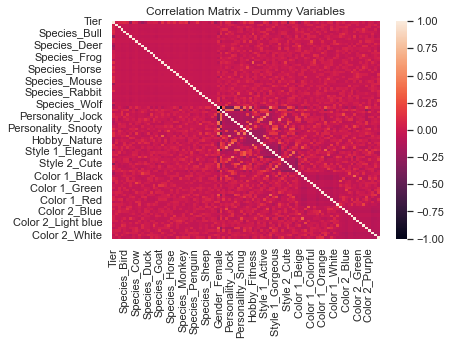

In [333]:
# Correlation heatmap between the variables using dummy variables
ax = sns.heatmap(df_dummies.corr())
ax.set_title('Correlation Matrix - Dummy Variables')
plt.show()

## Data Visualization Plots

<AxesSubplot:title={'center':'Animal Crossing Species'}>

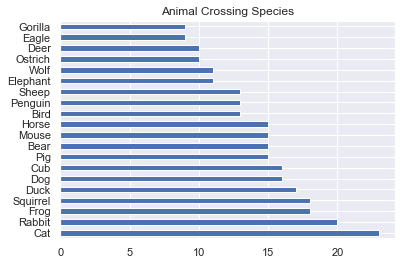

In [334]:
# Bar Plots
df['Species'].value_counts()[:20].plot(kind='barh',title='Animal Crossing Species')

<AxesSubplot:title={'center':'Animal Crossing Gender Balance'}, ylabel='Gender'>

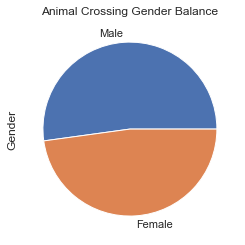

In [335]:
df['Gender'].value_counts()[:20].plot.pie(title='Animal Crossing Gender Balance')

<AxesSubplot:title={'center':'Animal Crossing Personalities'}>

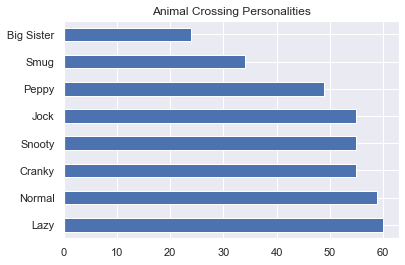

In [336]:
df['Personality'].value_counts()[:20].plot(kind='barh',title='Animal Crossing Personalities')

<AxesSubplot:title={'center':'Animal Crossing Hobbies'}>

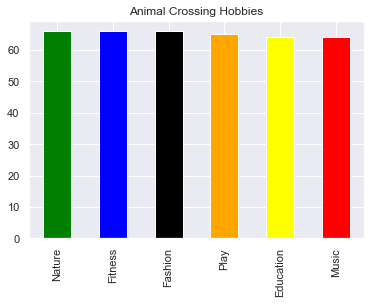

In [337]:
df['Hobby'].value_counts()[:20].plot(kind='bar',title='Animal Crossing Hobbies',
                                     color=['green','blue','black','orange','yellow','red'])

<AxesSubplot:title={'center':'Animal Crossing Primary Styles'}>

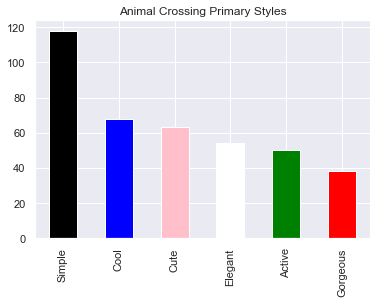

In [338]:
df['Style 1'].value_counts()[:20].plot(kind='bar',title='Animal Crossing Primary Styles',
                                       color=['black','blue','pink','white','green','red'])

<AxesSubplot:title={'center':'Animal Crossing Primary Colors'}>

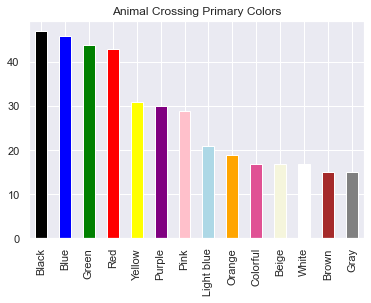

In [339]:
df['Color 1'].value_counts()[:20].plot(kind='bar',
                                       color=['black', 'blue', 'green', 'red', 'yellow','purple','pink','#add8e6',
                                              'orange','#e05194','beige','white','brown','gray'],
                                       title='Animal Crossing Primary Colors')




In [340]:
#Trying Ordinal Encoding for categories
# Load libraries
from sklearn.preprocessing import OrdinalEncoder
# Set up lists of variables and order of their categories
SpeciesVar = ['LotShape']
SpeciesCat = ['Alligator','Anteater','Bear','Bird','Bull','Cat','Chicken','Cow','Cub','Deer','Dog','Duck','Eagle',
              'Elephant','Frog','Goat','Gorilla','Hamster','Hippo','Horse','Kangaroo','Koala','Lion','Monkey','Mouse',
              'Octopus','Ostrich','Penguin','Pig','Rabbit','Rhino','Sheep','Squirrel','Tiger','Wolf']

GenderVar = ['Gender']
GenderCat = ['Male', 'Female']

PersonalityVar = ['Personality']
PersonalityCat = ['Big Sister','Cranky','Jock','Lazy','Normal','Peppy','Smug','Snooty']

HobbyVar = ['Hobby']
HobbyCat = ['Education','Fashion','Fitness','Music','Nature','Play']

Style1Var = ['Style1']
Style1Cat = ['Active','Cool','Cute','Elegant','Gorgeous','Simple']

Style2Var = ['Style2']
Style2Cat = ['Active','Cool','Cute','Elegant','Gorgeous','Simple']

Color1Var = ['Color1']
Color1Cat = ['Beige','Black','Blue','Brown','Colorful','Gray','Green','Light blue','Orange','Pink','Purple','Red',
             'White','Yellow']

Color2Var = ['Color2']
Color2Cat = ['Beige','Black','Blue','Brown','Colorful','Gray','Green','Light blue','Orange','Pink','Purple','Red',
             'White','Yellow']

In [341]:
df.head(5)

,Species,Gender,Personality,Hobby,Style 1,Style 2,Color 1,Color 2,Rank,Tier
0,Bird,Male,Cranky,Nature,Cool,Cool,Black,Blue,300,6
1,Squirrel,Female,Peppy,Fitness,Active,Simple,Blue,Black,117,4
2,Pig,Female,Big Sister,Play,Simple,Elegant,Pink,White,76,4
3,Gorilla,Male,Lazy,Fitness,Active,Active,Red,White,275,6
4,Alligator,Male,Lazy,Play,Simple,Simple,Red,Blue,152,5


In [342]:
# ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
ordinal_df = encoder.fit_transform(df)
print(ordinal_df)

[[  3.   1.   1. ...   2. 279.   5.]
 [ 32.   0.   5. ...   1. 103.   3.]
 [ 28.   0.   0. ...  12.  67.   3.]
 ...
 [ 21.   0.   7. ...  13. 268.   5.]
 [  9.   1.   6. ...   5.  58.   2.]
 [ 25.   1.   3. ...  13.   4.   0.]]


In [343]:
ordinal_df = pd.DataFrame(ordinal_df)
df.head(5)

,Species,Gender,Personality,Hobby,Style 1,Style 2,Color 1,Color 2,Rank,Tier
0,Bird,Male,Cranky,Nature,Cool,Cool,Black,Blue,300,6
1,Squirrel,Female,Peppy,Fitness,Active,Simple,Blue,Black,117,4
2,Pig,Female,Big Sister,Play,Simple,Elegant,Pink,White,76,4
3,Gorilla,Male,Lazy,Fitness,Active,Active,Red,White,275,6
4,Alligator,Male,Lazy,Play,Simple,Simple,Red,Blue,152,5


In [344]:
ordinal_df = ordinal_df.set_axis(['Species', 'Gender', 'Personality', 'Hobby', 'Style1','Style2','Color1','Color2',
                                  'Rank','Tier'], axis=1, inplace=False)

ordinal_df.head(5)
ordinal_df.to_csv('ordinal_df.csv',index=True)

In [345]:
# Correlation Matrix of Ordinal Encoding Values
ordinal_df.corr()

,Species,Gender,Personality,Hobby,Style1,Style2,Color1,Color2,Rank,Tier
Species,1.000000,-0.104357,0.065982,-0.089756,-0.052597,-0.129535,-0.012944,0.035352,-0.001228,-0.010763
Gender,-0.104357,1.000000,-0.453871,0.265013,0.031489,-0.016666,-0.202289,-0.184093,0.048264,0.083364
Personality,0.065982,-0.453871,1.000000,-0.286020,0.145240,0.088106,0.012012,0.024117,0.081446,0.014447
Hobby,-0.089756,0.265013,-0.286020,1.000000,0.074450,0.006094,-0.047212,0.058157,-0.216734,-0.168648
Style1,-0.052597,0.031489,0.145240,0.074450,1.000000,-0.160484,-0.019639,-0.002115,-0.069576,-0.082396
Style2,-0.129535,-0.016666,0.088106,0.006094,-0.160484,1.000000,0.050611,-0.076981,-0.047307,-0.009959
Color1,-0.012944,-0.202289,0.012012,-0.047212,-0.019639,0.050611,1.000000,-0.086041,0.091342,0.080241
Color2,0.035352,-0.184093,0.024117,0.058157,-0.002115,-0.076981,-0.086041,1.000000,-0.008234,-0.049350
Rank,-0.001228,0.048264,0.081446,-0.216734,-0.069576,-0.047307,0.091342,-0.008234,1.000000,0.894100
Tier,-0.010763,0.083364,0.014447,-0.168648,-0.082396,-0.009959,0.080241,-0.049350,0.894100,1.000000


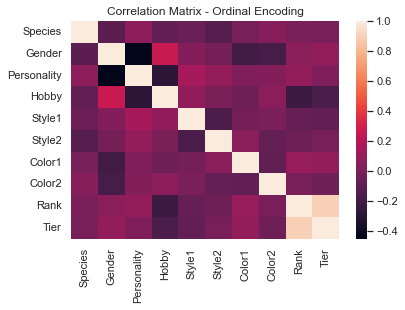

In [346]:
# Correlation Matrix Visual Heatmap of Ordinal Encoding Values
ax = sns.heatmap(ordinal_df.corr())
ax.set_title('Correlation Matrix - Ordinal Encoding')
plt.show()

This correlation matrix is showing something interesting with Gender and Personality and Gender. Let's dive into
gender deeper. Going to use PowerBI for this section.

In [355]:
# exporting data sets
df_dummy = pd.merge(df_dummies, df, left_index=True, right_index=True)
df_ordinal = pd.merge(ordinal_df, df, left_index=True, right_index=True)
df_dummy.to_csv('df_dummy.csv',index=True)
ordinal_df.to_csv('df_ordinal.csv',index=True)



